In [1]:
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


Using TensorFlow backend.


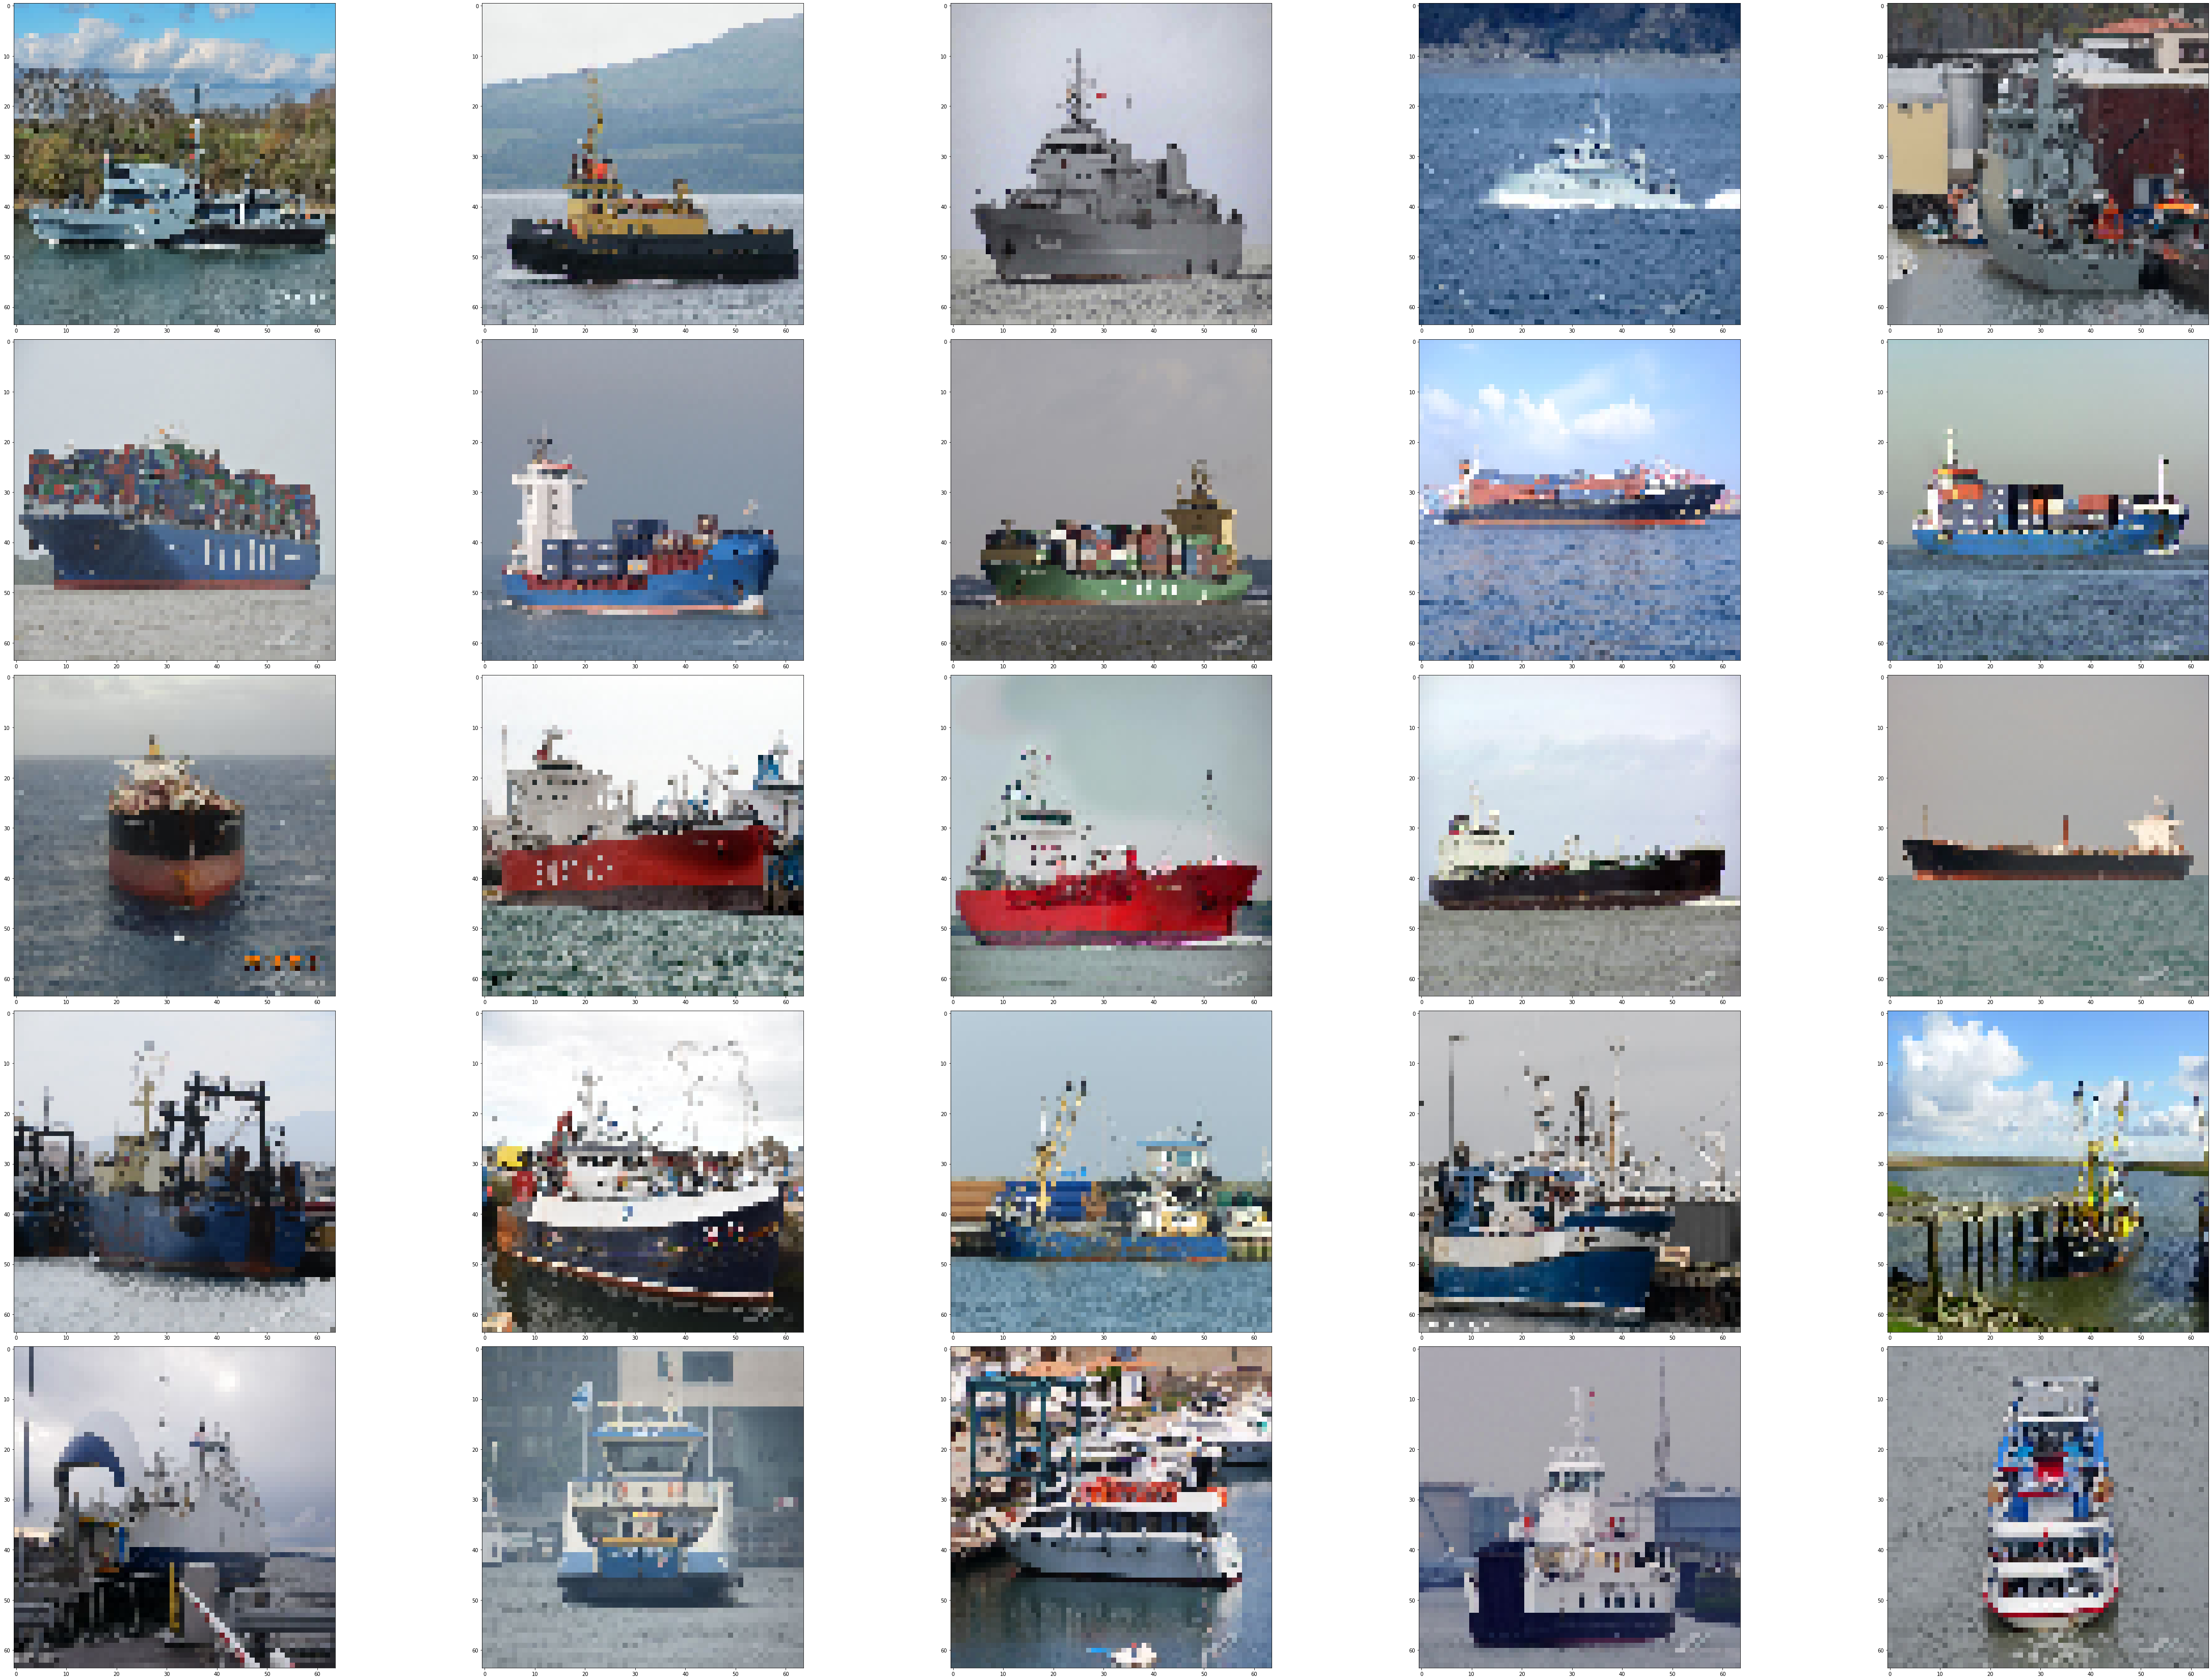

In [18]:
# size of the image: 48*48 pixels
pic_size = 64

# input path for the images
base_path = "/home/jose/Masaüstü/ship_dataset_2250/"

plt.figure(0, figsize=(pic_size,pic_size))
cpt = 0

for expression in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [3]:
for expression in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " ship_dataset")

400 military ship_dataset
400 container ship_dataset
400 tanker ship_dataset
400 fishing ship_dataset
400 cruise ship_dataset


In [4]:
from keras.preprocessing.image import ImageDataGenerator

# number of images to feed into the NN for every batch
batch_size = 64
# number of epochs to train the NN
epochs = 200
#max plot test sample
num_of_test_samples = 200

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path + "validation",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 2000 images belonging to 5 classes.
Found 250 images belonging to 5 classes.


In [5]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 5

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(pic_size, pic_size,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:


from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("thesis_first_model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
31/31 [==============================] - 56s 2s/step - loss: 1.8401 - acc: 0.2641 - val_loss: 2.0084 - val_acc: 0.2604

Epoch 00001: val_acc improved from -inf to 0.26042, saving model to thesis_first_model_weights.h5
Epoch 2/200
31/31 [==============================] - 50s 2s/step - loss: 1.6585 - acc: 0.3181 - val_loss: 1.6923 - val_acc: 0.3441

Epoch 00002: val_acc improved from 0.26042 to 0.34409, saving model to thesis_first_model_weights.h5
Epoch 3/200
31/31 [==============================] - 52s 2s/step - loss: 1.5659 - acc: 0.3650 - val_loss: 1.3181 - val_acc: 0.4731

Epoch 00003: val_acc improved from 0.34409 to 0.47312, saving model to thesis_first_model_weights.h5
Epoch 4/200
31/31 [==============================] - 53s 2s/step - loss: 1.4776 - acc: 0.4015 - val_loss: 1.6736 - val_acc: 0.4409

Epoch 00004: val_acc did not improve from 0.47312
Epoch 5/200
31/31 [==============================] - 92s 3s/step - loss: 1

31/31 [==============================] - 50s 2s/step - loss: 0.7486 - acc: 0.7002 - val_loss: 1.0542 - val_acc: 0.5591

Epoch 00043: val_acc did not improve from 0.55914
Epoch 44/200
31/31 [==============================] - 51s 2s/step - loss: 0.7205 - acc: 0.7227 - val_loss: 1.6447 - val_acc: 0.3871

Epoch 00044: val_acc did not improve from 0.55914
Epoch 45/200
31/31 [==============================] - 51s 2s/step - loss: 0.7000 - acc: 0.7237 - val_loss: 1.3751 - val_acc: 0.4740

Epoch 00045: val_acc did not improve from 0.55914
Epoch 46/200
31/31 [==============================] - 54s 2s/step - loss: 0.7330 - acc: 0.7258 - val_loss: 1.3929 - val_acc: 0.4677

Epoch 00046: val_acc did not improve from 0.55914
Epoch 47/200
31/31 [==============================] - 51s 2s/step - loss: 0.6704 - acc: 0.7409 - val_loss: 1.0573 - val_acc: 0.5645

Epoch 00047: val_acc improved from 0.55914 to 0.56452, saving model to thesis_first_model_weights.h5
Epoch 48/200
31/31 [===========================

31/31 [==============================] - 51s 2s/step - loss: 0.0922 - acc: 0.9688 - val_loss: 1.7266 - val_acc: 0.5323

Epoch 00130: val_acc did not improve from 0.67742
Epoch 131/200
31/31 [==============================] - 53s 2s/step - loss: 0.0972 - acc: 0.9733 - val_loss: 1.6845 - val_acc: 0.6075

Epoch 00131: val_acc did not improve from 0.67742
Epoch 132/200
31/31 [==============================] - 53s 2s/step - loss: 0.1037 - acc: 0.9607 - val_loss: 1.9299 - val_acc: 0.5108

Epoch 00132: val_acc did not improve from 0.67742
Epoch 133/200
31/31 [==============================] - 49s 2s/step - loss: 0.0888 - acc: 0.9748 - val_loss: 1.5438 - val_acc: 0.6042

Epoch 00133: val_acc did not improve from 0.67742
Epoch 134/200
31/31 [==============================] - 51s 2s/step - loss: 0.1010 - acc: 0.9663 - val_loss: 1.3418 - val_acc: 0.6290

Epoch 00134: val_acc did not improve from 0.67742
Epoch 135/200
31/31 [==============================] - 51s 2s/step - loss: 0.0869 - acc: 0.970


Epoch 00174: val_acc did not improve from 0.67742
Epoch 175/200
31/31 [==============================] - 49s 2s/step - loss: 0.0511 - acc: 0.9864 - val_loss: 1.6418 - val_acc: 0.6398

Epoch 00175: val_acc did not improve from 0.67742
Epoch 176/200
31/31 [==============================] - 51s 2s/step - loss: 0.0396 - acc: 0.9864 - val_loss: 1.8540 - val_acc: 0.5914

Epoch 00176: val_acc did not improve from 0.67742
Epoch 177/200
31/31 [==============================] - 53s 2s/step - loss: 0.0519 - acc: 0.9819 - val_loss: 1.7691 - val_acc: 0.6354

Epoch 00177: val_acc did not improve from 0.67742
Epoch 178/200
31/31 [==============================] - 59s 2s/step - loss: 0.0559 - acc: 0.9789 - val_loss: 1.6152 - val_acc: 0.6398

Epoch 00178: val_acc did not improve from 0.67742
Epoch 179/200
31/31 [==============================] - 99s 3s/step - loss: 0.0556 - acc: 0.9784 - val_loss: 1.5154 - val_acc: 0.6828

Epoch 00179: val_acc improved from 0.67742 to 0.68280, saving model to thesis_f

In [7]:
model_json = model.to_json()
with open("thesis_first_model.json", "w") as json_file:
    json_file.write(model_json)

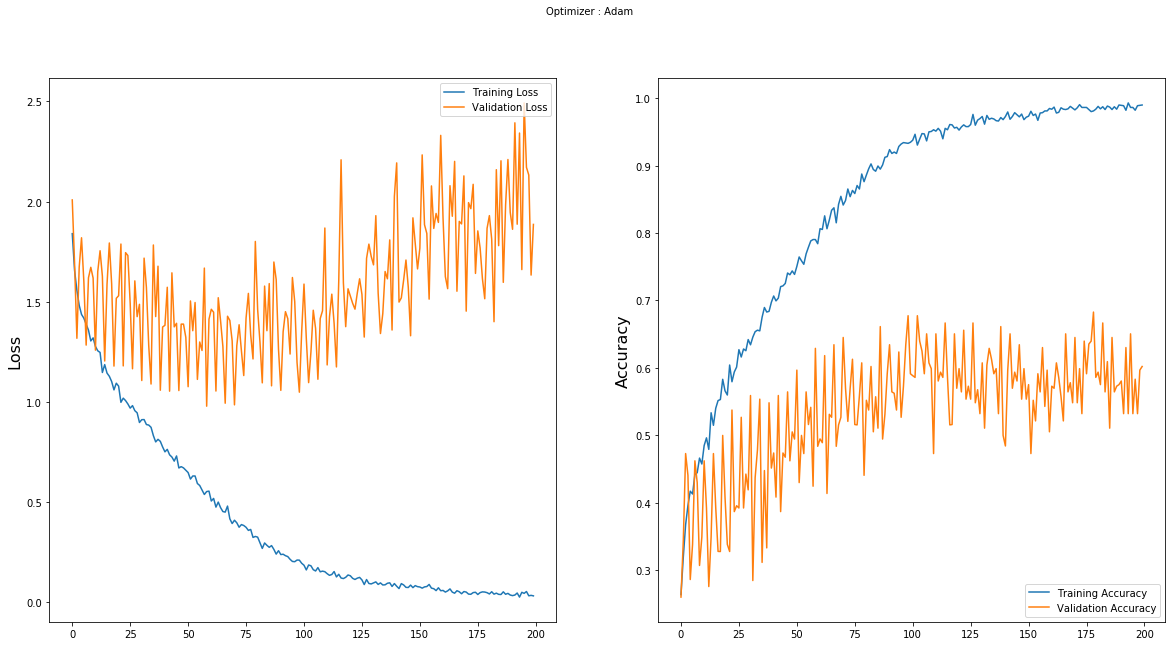

In [8]:

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [9]:
#filenames = validation_generator.filenames
#nb_samples = len(filenames)
#predictions = model.predict_generator(generator=validation_generator, steps = nb_samples)



predictions = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)

In [10]:
y_pred = [np.argmax(probas) for probas in predictions]


In [11]:
y_test = validation_generator.classes


In [12]:
class_names = validation_generator.class_indices.keys()
print(class_names)

dict_keys(['container', 'cruise', 'fishing', 'military', 'tanker'])


<Figure size 432x288 with 0 Axes>

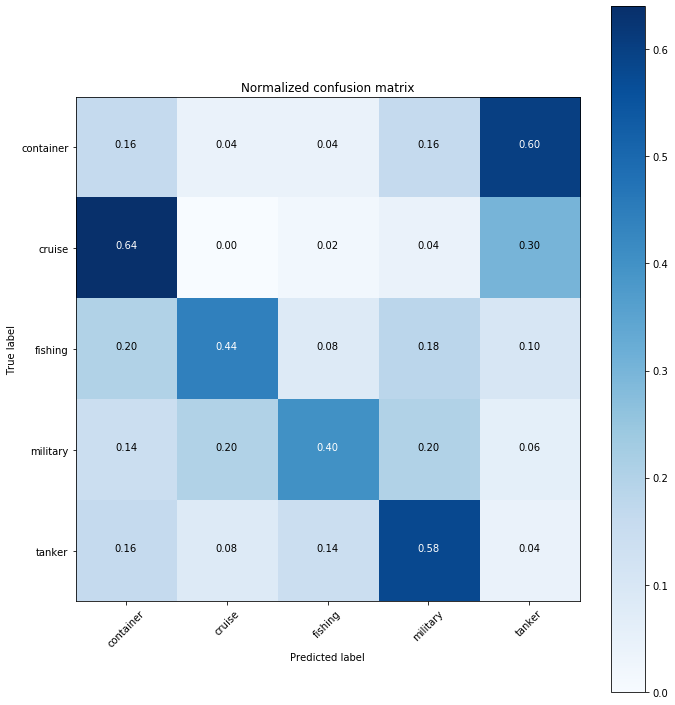

In [13]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)       512       
__________

In [15]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png')

In [16]:
plot_model(model, to_file='multilayer_perceptron_graph.png')

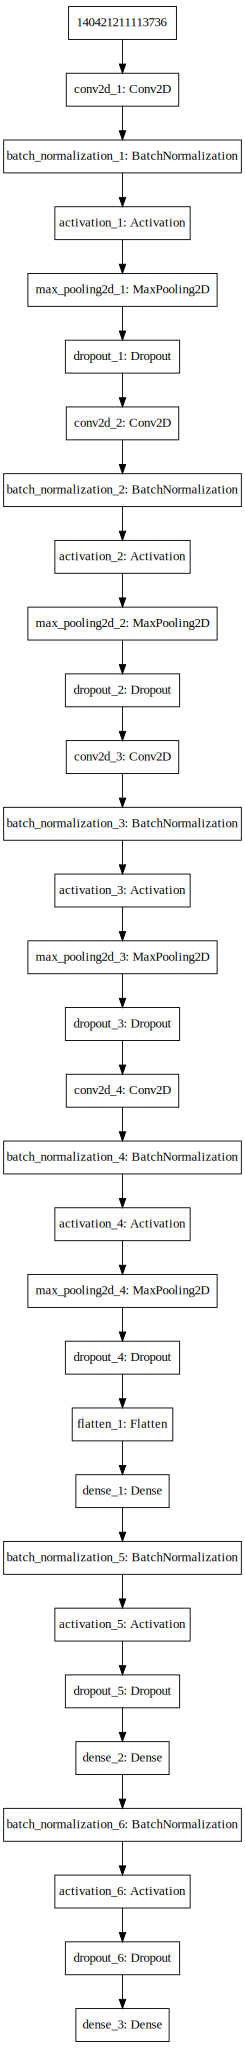

In [17]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot


SVG(model_to_dot(model).create(prog='dot', format='svg'))